# Classification : unique

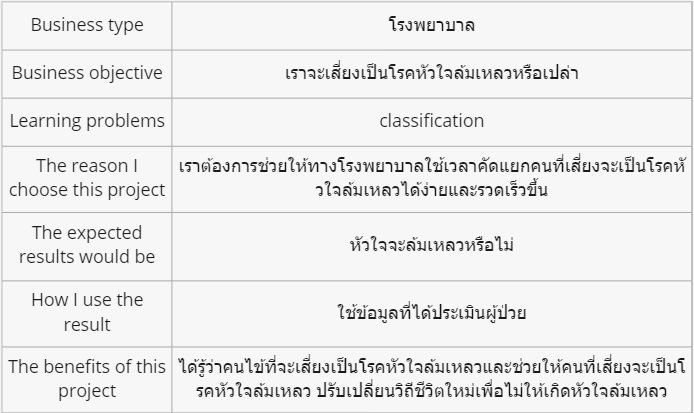

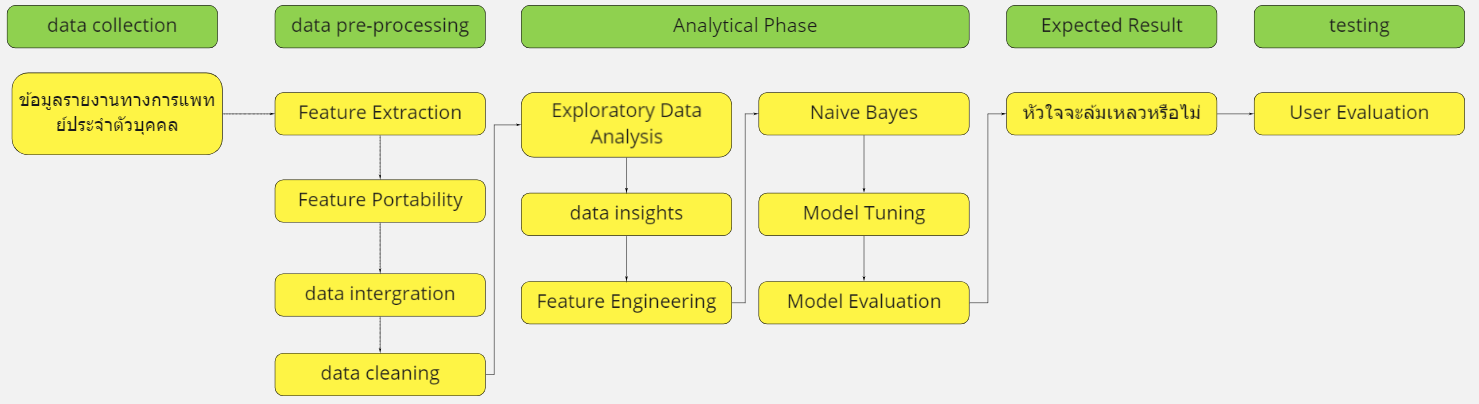

# Import

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
!pip install pycaret

In [ ]:
#จัดเก็บข้อมูลใน heart 
heart = pd.read_csv('https://raw.githubusercontent.com/chayakornpray/heart/main/heart.csv')
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0




1. Age 
  * อายุ
2. Sex 
  * เพศ
3. ChestPainType 
  * เจ็บหน้าอก
    * TA : Typical Angina
      * อาการเจ็บหน้าอกระบุได้ชัดเจนว่าเป็นอาการกล้ามเนื้อหัวใจขาดเลือด
    * ATA : Atypical Angina
      * เจ็บหน้าอกแบบแหลมๆเสียด หรือเจ็บที่ข้างซ้ายไม่ตรงกลาง
    * NAP : Non-Anginal Pain
      * อาการเจ็บหน้าอกที่ไม่เกี่ยวข้องกับความผิดปกติของหัวใจและหลอดเลือด
    * ASY : Asymptomatic
      * ไม่มีอาการ
4. RestingBP 
  * ความดันเลือดขณะพัก
    * จะใช้หน่วยเป็น [mm Hg]
5. Cholesterol 
  * ไขมันในเลือด
    * จะใช้หน่วยเป็น [mg/dl]
6. FastingBS 
  * การตรวจน้ำตาลในเลือด
    * 1: if FastingBS > 120 mg/dl
    * 0: otherwise
7. RestingECG 
  * ผลการตรวจคลื่นไฟฟ้าหัวใจขณะพัก
    * Normal : ปกติ
    * ST : 
      * having ST-T wave abnormality
        * ความผิดปกติของ ST segment หรือเรียกว่าความผิดปกติ T wave
    * LVH
      * Left ventricular hypertrophy
        * ภาวะหัวใจห้องล่างซ้ายโต
8. MaxHR 
  * อัตราการเต้นของหัวใจสูงสุด
    * Numeric value between 60 and 202
9. ExerciseAngina 
  * อาการของโรคเส้นเลือดหัวใจตีบ
    * [Y: Yes, N: No]
10. Oldpeak 
  * เกิดจากการออกกำลังกายสัมพันธ์กับการพักผ่อนโดยวัดจาก st หรือคลื่นหัวใจ
    * ST [Numeric value measured in depression]
11. ST_Slope 
  * ความชันของการออกกำลังกายสูงสุด เซ็กเมนต์ ST
      * Up: upsloping
      * Flat: flat
      * Down: downsloping
12. HeartDisease 
  * เป็นโรคหัวใจล้มเหลว
      * 1: heart disease
      * 0: Normal



In [ ]:
#copy ข้อมูลลงใน df
df = heart.copy()

#createfun

In [ ]:
def get_iqr_values(df_in, col_name):
    median = df_in[col_name].median()
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3-q1 #Interquartile range
    minimum  = q1-1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3+1.5*iqr # The maximum value or the -| marker in the box plot
    return median,minimum, maximum
    #สร้างฟังชั่นสำหรับ return ค่า outline

In [ ]:
def Age_bin(data):
    def bins(x):
        if x > 70:
          # old more
          return 4
        elif x > 50:
          # old
          return 3
        elif x > 30:
          # middle age
          return 2
        else:
            return 1
    return data.apply(lambda x: bins(x))
    #สร้างฟังชั่นสำหรับเปลี่ยนข้อมูลอายุให้เป็น bin 

In [ ]:
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values
    #สร้างฟังชั่นสำหรับเช็คค่าว่าง

# Check

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
missing(df)#เรียกใช้ ฟังชั่นเพื่อเช็คค่าว่าง

,Missing_Number,Missing_Percent
HeartDisease,0,0.0
ST_Slope,0,0.0
Oldpeak,0,0.0
ExerciseAngina,0,0.0
MaxHR,0,0.0
RestingECG,0,0.0
FastingBS,0,0.0
Cholesterol,0,0.0
RestingBP,0,0.0
ChestPainType,0,0.0


In [ ]:
df["FastingBS"] = df["FastingBS"].astype(str).astype(object)

In [ ]:
df.describe(include=object) #ดูข้อมูลข้องคอลั่มที่เป็น object

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918,918
unique,2,4,2,3,2,3
top,M,ASY,0,Normal,N,Flat
freq,725,496,704,552,547,460


In [ ]:
df.duplicated().sum()#เช็คค่าซ้ำ

0

In [ ]:
df.select_dtypes("number").describe() 

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,1.000000


# Pre-processing

In [ ]:
#1 = F, 0=M
df['Sex_bin'] = df['Sex'].apply(lambda x: 1 if x=='F' else 0)
#0=ASY ,1=ATA ,2=NAP , 3=TA
df['ChestPainType_bin'] = df['ChestPainType'].apply(lambda x: 0 if x=='ASY' else (1 if x=='ATA' else (2 if x=='NAP' else 3)))
#0=Normal ,1=ST , 2= LVH
df['RestingECG_bin'] = df['RestingECG'].apply(lambda x: 0 if x=='Normal' else (1 if x=='ST' else 2))
#1 = Y, 0=N
df['ExerciseAngina_bin'] = df['ExerciseAngina'].apply(lambda x: 1 if x=='Y' else 0)
#0 = Down,1 = Flat,2 = Up     
df['ST_Slope_bin'] = df['ST_Slope'].apply(lambda x: 0 if x=='Down' else (1 if x=='Flat' else 2))
#เรียกใช้ฟังชั่น Agebin
df['age_bin'] = Age_bin(df['Age'])

# Eda

In [ ]:
fig = px.histogram(df, 'HeartDisease',width=700,height=500,             
                   color="HeartDisease",histfunc="count",
                   title="<b>HeartDisease</b>")

fig.show()

In [ ]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

numerical = numerical.drop(['ChestPainType_bin', 'RestingECG_bin','ExerciseAngina_bin','ST_Slope_bin','age_bin','Sex_bin'])


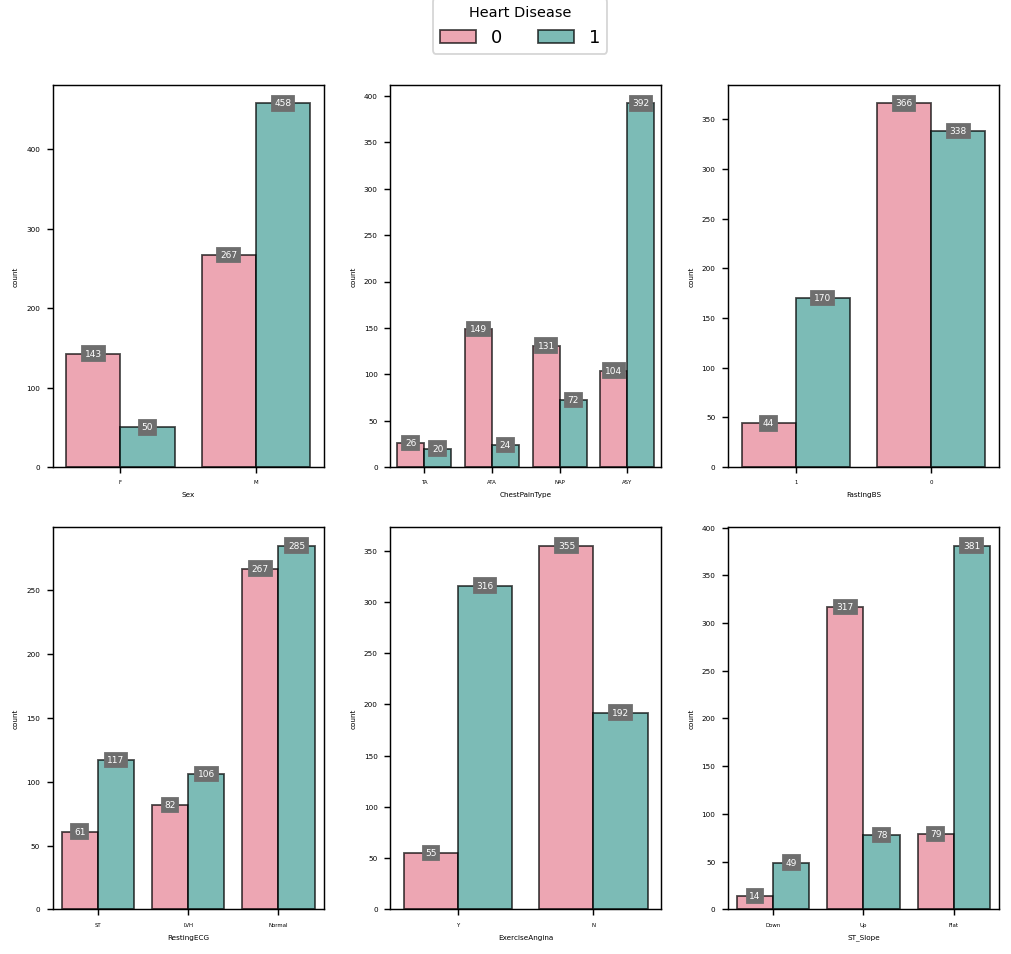

In [ ]:
with plt.rc_context(rc = {'figure.dpi': 130, 'axes.labelsize': 4, 
                          'xtick.labelsize': 3, 'ytick.labelsize': 4}):

    fig_1, ax_1 = plt.subplots(2, 3, figsize = (8, 7))
    
    for idx, (column, axes) in list(enumerate(zip(categorical, ax_1.flatten()))):
        
        order = df.groupby(column).size().sort_values(ascending = True).index.tolist()
    
        cplot = sns.countplot(ax = axes, x = df[column], hue = df['HeartDisease'],
                              order = order, linewidth = 1,
                              edgecolor = 'k', palette = 'husl', alpha = 0.7)
        
        axes.get_legend().remove()
        
        for p in cplot.patches:
        
            cplot.annotate(format(p.get_height(), '.0f'), 
                           (p.get_x() + p.get_width() / 2, p.get_height()), 
                           ha = 'center', va = 'center', size = 5, color = 'w',
                           bbox = dict(boxstyle = 'square, pad = 0.3', 
                           fc = '#6e6e6e', lw = 1, ec = '#6e6e6e'))
    
    else:
    
        [axes.set_visible(False) for axes in ax_1.flatten()[idx + 1:]]
    
    ### A global legend
    
    handles, labels = axes.get_legend_handles_labels()
    fig_1.legend(handles, labels, loc = 'upper center', 
                 bbox_to_anchor = (0.5, 1.06), ncol = 2, fontsize = 10,
                 title = 'Heart Disease', title_fontsize = 8)        

    plt.tight_layout(pad = 1.5)
    plt.show()

"Sex" : ผู้ป่วยชายมีอัตราการเจ็บป่วยสูงกว่าผู้หญิง

"Chest Pain Type" : ผู้ป่วยที่เป็นโรคหลอดเลือดหัวใจตีบผิดปรกติ (ATA)หรืออาการเจ็บที่ไม่ใช่เจ็บหน้าอก (NAP) มีโอกาสเป็นโรคหัวใจน้อยกว่าผู้ที่ไม่มีอาการมาก



"Resting ECG" : มีความผิดปกติของคลื่นSTแสดงภาวะหัวใจห้องล่างซ้ายที่น่าจะเป็น

"Exercise angina" : มากกว่า 85%ของผู้ป่วยที่เป็นโรคหลอดเลือดหัวใจตีบเป็นโรคหัวใจ

"ST Slope" : หมวดหมู่ Up และ Flat ส่งผลต่อโรคหัวใจล้มเหลว


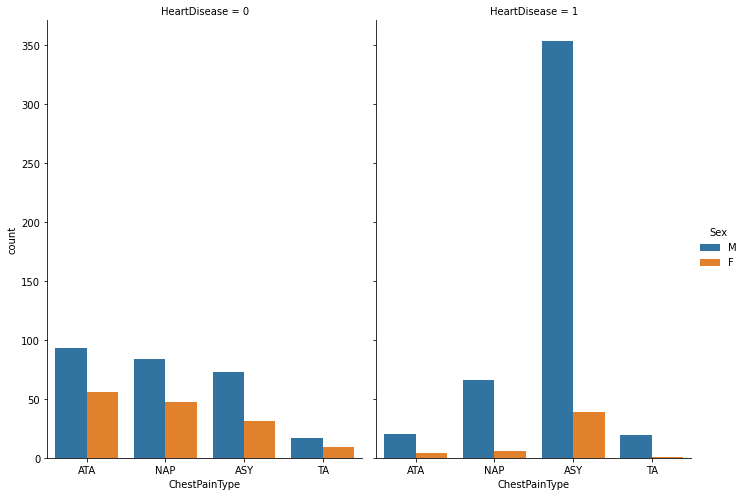

In [ ]:
g = sns.catplot(x="ChestPainType", hue="Sex", col="HeartDisease",
                data=df, kind="count",
                height=7, aspect=.7);
# plt.show()

เพศชายเจ็บหน้าอก asy มากกว่าเพศหญิงและคนที่เจ็บหน้าอกนั้นจะเสี่ยงหัวใจล้มเหลว

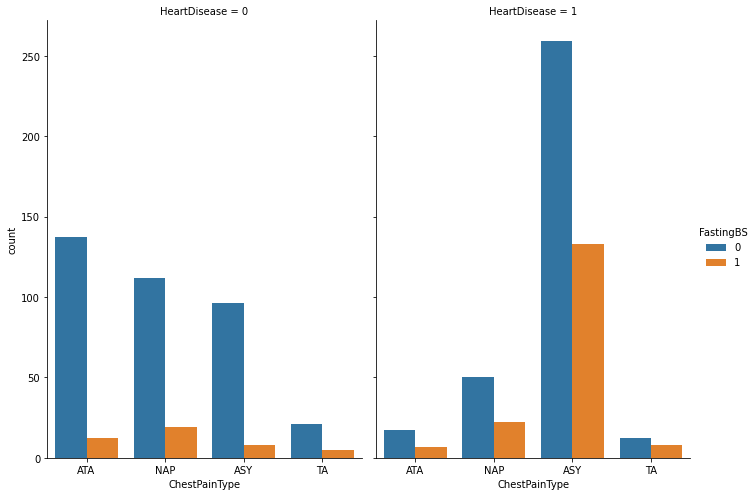

In [ ]:
g = sns.catplot(x="ChestPainType", hue="FastingBS", col="HeartDisease",
                data=df, kind="count",
                height=7, aspect=.7);
                # ST_Slope

"Fasting BS" : ผู้ที่มีน้ำตาลในเลือดต่ำกว่า 120 มก./ดล. และไม่ได้เจ็บหน้าออกแบบ asy นั้นจะไม่ค่อยเสี่ยงเป็นโรคหัวใจเหลว

และสรุปได้ว่าการเจ็บหน้าออกแบบ asy นั้นส่งผลต่อการเสี่ยงหัวใจล้มเหลวมากๆ

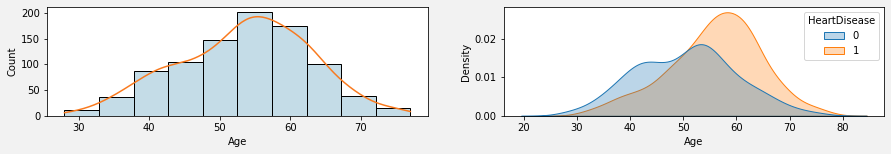

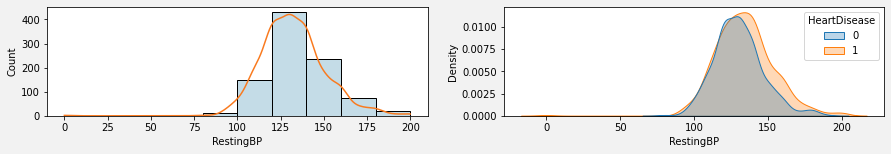

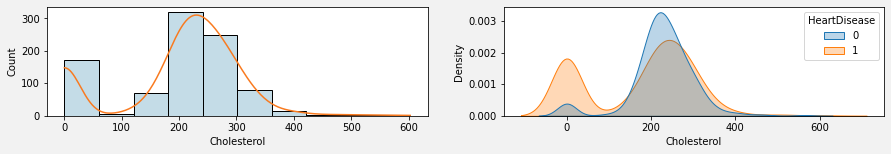

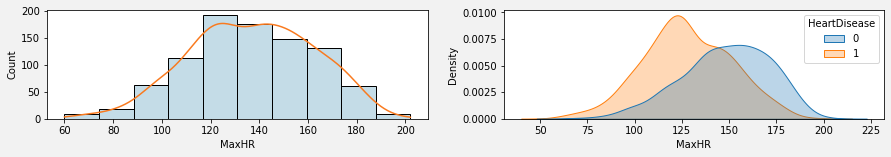

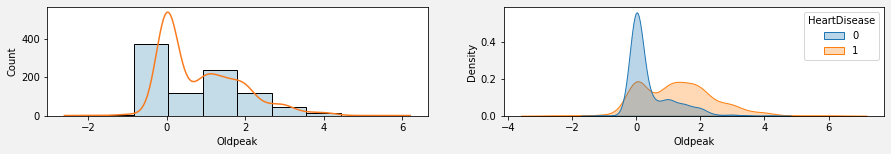

In [ ]:
color ='#8abbd0'

for i in numerical:
    fig, ax = plt.subplots(1,2, figsize=(15,2))
    fig.patch.set_facecolor( '#F2F2F2')
    sns.histplot(heart[i], bins=10, ax=ax[0],  color=color, kde=True)
    ax[0].lines[0].set_color('#F97A1F')
    sns.kdeplot(x=i,data=heart, hue='HeartDisease',ax=ax[1],shade=True, alpha=0.3)
    # sns.boxplot(x=i, data=heart,ax=ax[2], color=color)
    # sns.boxplot(x=i, data=heart, hue='HeartDisease',y=[""]*len(heart),ax=ax[3],palette=['#8abbd0','#F97A1F'],boxprops=dict(alpha=.3))
    plt.tight_layout

Age : อายุระหว่าง 55-60 มีโอกาศเป็นมากกว่า

RestingBP :  ความดันโลหิตของผู้ป่วย เป็นไปไม่ได้ที่จะมีค่าเท่ากับ 0;

Cholesterol :คอเลสเตอรอลมีค่าเป็นศูนย์เยอะเกินไป

MaxHR : 120-125 มีโอกาศมากกว่าที่จะเป็น

Oldpeak : ที่อยู่ระหว่าง 0 จะไม่ค่อยเป็น




# Feature Engineering

In [ ]:
# df.loc[df['RestingBP'] == 0,['RestingBP']].value_counts()

df.loc[df['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_bin,ChestPainType_bin,RestingECG_bin,ExerciseAngina_bin,ST_Slope_bin,age_bin
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,0,2,0,0,1,3


In [ ]:
df = df.drop(df[(df['RestingBP'] == 0)].index)

In [ ]:
med,min,max = get_iqr_values(df,'Cholesterol')
df.loc[df['Cholesterol'] > max,['Cholesterol']].value_counts()

Cholesterol
603            1
564            1
529            1
518            1
491            1
468            1
466            1
458            1
417            1
412            1
409            1
407            1
dtype: int64

In [ ]:
df.loc[df['Cholesterol'] < min,['Cholesterol']].value_counts()

Cholesterol
0              171
dtype: int64

In [ ]:
df = df.drop(df[(df['Cholesterol'] == 0)].index)

In [ ]:
for i in heart['Cholesterol']:
    if i > max:
            df['Cholesterol'] = df['Cholesterol'].replace(i, max)

เนื่องจากค่านอก outline เยอะและไม่สมดุลอย่างมากใน cholesterol จึงใช้การใช้ค่า max มาแทนค่า
และค่า 0 ใน cholesterol เราได้ทำการลบทิ้ง

In [ ]:
drop_col = ['ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope','Age','Sex']
df = df.drop(drop_col, axis=1)

# Ex1

#pycaret

In [ ]:
from pycaret.classification import *

In [ ]:
clf1 = setup(data = df, 
             target = 'HeartDisease',
             train_size = 0.7,
             session_id = 123,
             fold = 10,
             numeric_features  = ['RestingBP', 'Cholesterol','MaxHR', 'Oldpeak'],
             categorical_features = [ 'FastingBS','ChestPainType_bin', 'RestingECG_bin', 'ExerciseAngina_bin', 'ST_Slope_bin', 'age_bin', 'Sex_bin'],
             silent = True
             )

,Description,Value
0,session_id,123
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(746, 12)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


### Modeling

In [ ]:
compare_models(sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.4713,0.0000,1.0000,0.4713,0.6406,0.0000,0.0000,0.015
nb,Naive Bayes,0.8082,0.8974,0.8975,0.7477,0.8147,0.6191,0.6330,0.017
rf,Random Forest Classifier,0.8485,0.9181,0.8612,0.8309,0.8423,0.6966,0.7028,0.508
ridge,Ridge Classifier,0.8485,0.0000,0.8532,0.8352,0.8410,0.6964,0.7013,0.013
lda,Linear Discriminant Analysis,0.8485,0.9104,0.8532,0.8352,0.8410,0.6964,0.7013,0.012
lr,Logistic Regression,0.8466,0.9113,0.8490,0.8332,0.8382,0.6922,0.6968,0.468
gbc,Gradient Boosting Classifier,0.8523,0.9026,0.8490,0.8405,0.8432,0.7035,0.7060,0.081
et,Extra Trees Classifier,0.8466,0.9135,0.8412,0.8404,0.8382,0.6925,0.6962,0.404
lightgbm,Light Gradient Boosting Machine,0.8427,0.9003,0.8367,0.8344,0.8316,0.6841,0.6899,0.130
ada,Ada Boost Classifier,0.8389,0.8916,0.8163,0.8427,0.8254,0.6758,0.6821,0.074


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

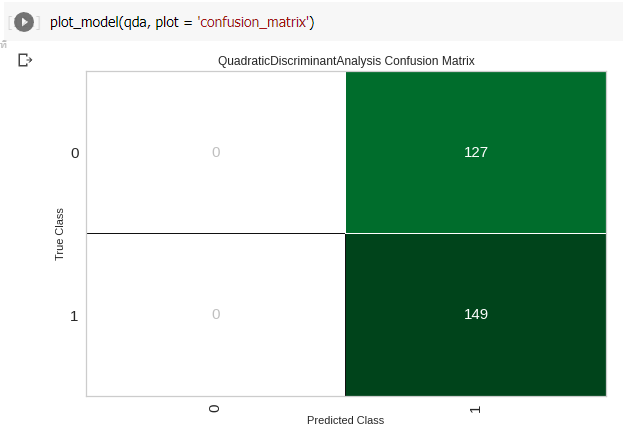

เพราะเราโฟกัสเคศที่เราทำนายไม่เป็นแต่เค้าเป็น

ต้องดูที่ Recall เพราะว่า ต้องการทำนายผลผิดน้อยที่สุด
เหตุผลที่ไม่เลือก Quadratic Discriminant Analysis	และ Dummy Classifier	เพราะไม่ว่าข้อมูลจะมายังไงมันก็จะทำนายว่าเป็น(1)

#### Benchmark

#####Naive Bayes

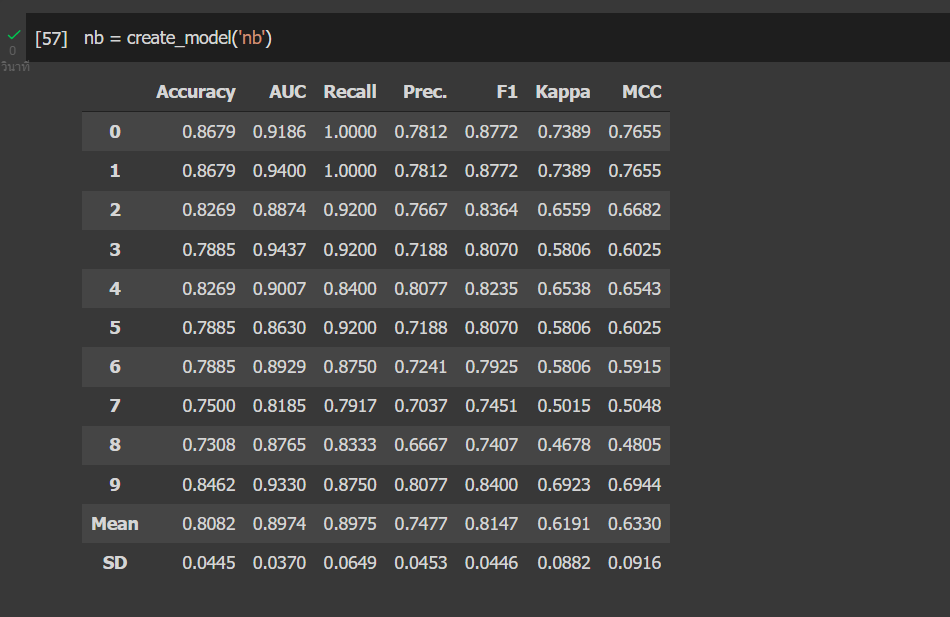
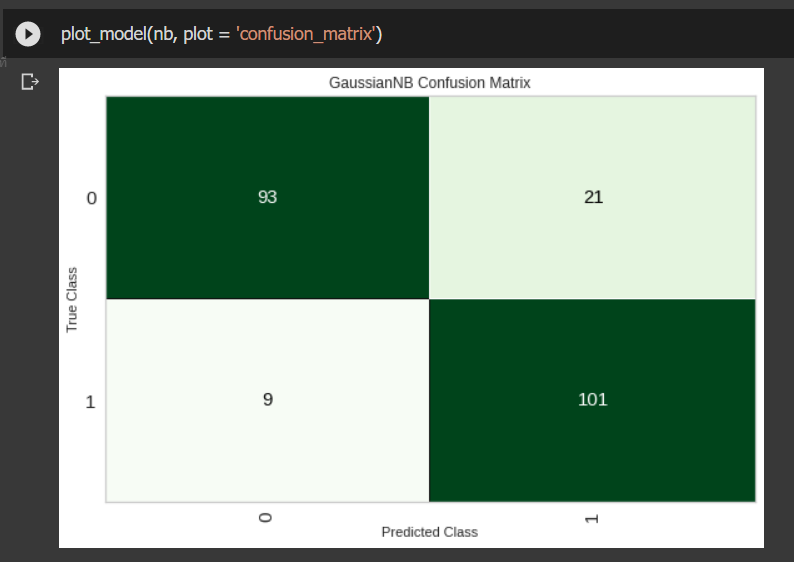

----------------------------------------------------



#####Random Forest Classifier

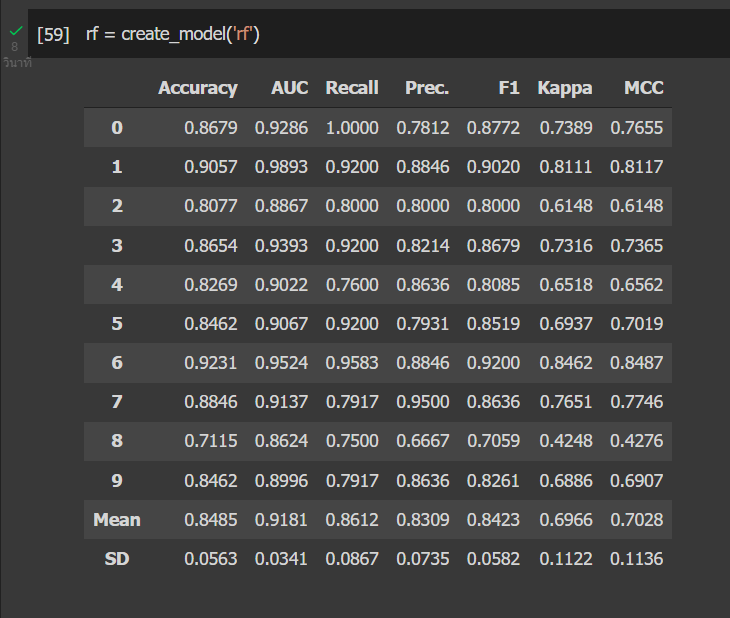
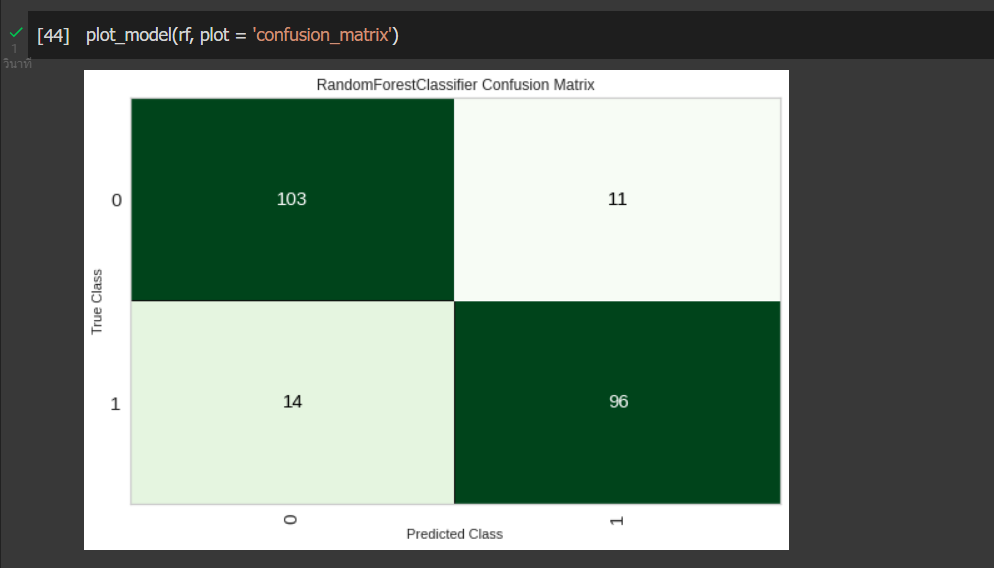

--------------------

-----

#####Ridge Classifier	

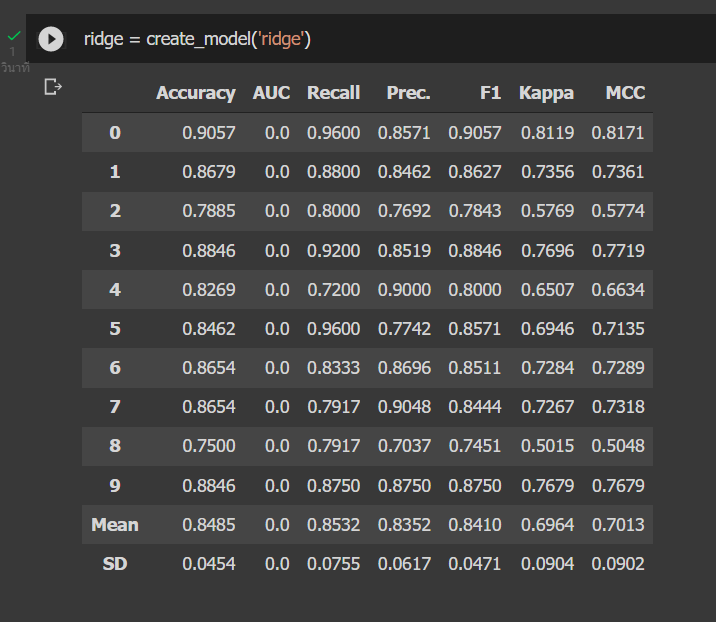
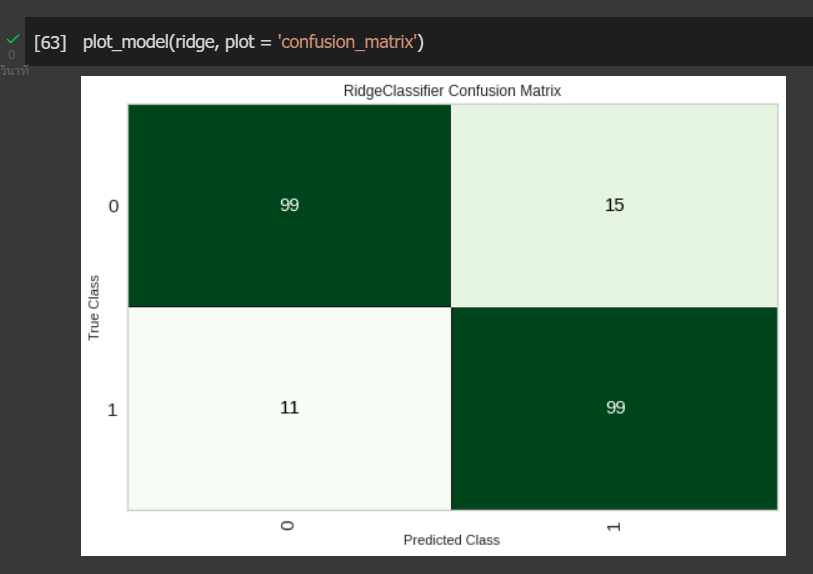

---------------------------

In [ ]:
compare_models(['nb','rf','ridge'],sort='Recall')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.8082,0.8974,0.8975,0.7477,0.8147,0.6191,0.6330,0.020
rf,Random Forest Classifier,0.8485,0.9181,0.8612,0.8309,0.8423,0.6966,0.7028,0.514
ridge,Ridge Classifier,0.8485,0.0000,0.8532,0.8352,0.8410,0.6964,0.7013,0.017


GaussianNB(priors=None, var_smoothing=1e-09)

##### สรุป nb rf gbc



>  เราจะเลือก Model ที่มีค่า Recall มากทีสุด

 เหตุผล
 เพราะว่าธุรกิจของเราจะได้รับผลกระทบมากที่สุด จากการที่เราทำนายว่าเค้าไม่เสี่ยงหัวใจล้มเหลวแต่เค้าเป็นโรคหัวใจล้มเหลวอาจจะทำให้มีการเสียชีวิต 



> nb  0.8975


>rf  0.8612


>ridge  0.8532

เราเลือก Naive Bayes


-----

#### Hyperparameters Tuning

In [ ]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8679,0.9186,1.0000,0.7812,0.8772,0.7389,0.7655
1,0.8679,0.9400,1.0000,0.7812,0.8772,0.7389,0.7655
2,0.8269,0.8874,0.9200,0.7667,0.8364,0.6559,0.6682
3,0.7885,0.9437,0.9200,0.7188,0.8070,0.5806,0.6025
4,0.8269,0.9007,0.8400,0.8077,0.8235,0.6538,0.6543
5,0.7885,0.8630,0.9200,0.7188,0.8070,0.5806,0.6025
6,0.7885,0.8929,0.8750,0.7241,0.7925,0.5806,0.5915
7,0.7500,0.8185,0.7917,0.7037,0.7451,0.5015,0.5048
8,0.7308,0.8765,0.8333,0.6667,0.7407,0.4678,0.4805
9,0.8462,0.9330,0.8750,0.8077,0.8400,0.6923,0.6944


สร้าง model เพื่อนำไปใช้งาน

In [ ]:
nb

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
params = {
    "var_smoothing": [1e-09,2e-09,3e-09,4e-09,5e-09,6e-09,7e-09,8e-09,9e-09]
}
#0.000000001-0.000000009

In [ ]:
tuned_nb = tune_model(nb,optimize="Recall",custom_grid=params)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8679,0.9186,1.0000,0.7812,0.8772,0.7389,0.7655
1,0.8679,0.9400,1.0000,0.7812,0.8772,0.7389,0.7655
2,0.8269,0.8874,0.9200,0.7667,0.8364,0.6559,0.6682
3,0.7885,0.9437,0.9200,0.7188,0.8070,0.5806,0.6025
4,0.8269,0.9007,0.8400,0.8077,0.8235,0.6538,0.6543
5,0.7885,0.8630,0.9200,0.7188,0.8070,0.5806,0.6025
6,0.7885,0.8929,0.8750,0.7241,0.7925,0.5806,0.5915
7,0.7500,0.8185,0.7917,0.7037,0.7451,0.5015,0.5048
8,0.7308,0.8765,0.8333,0.6667,0.7407,0.4678,0.4805
9,0.8462,0.9330,0.8750,0.8077,0.8400,0.6923,0.6944


ทำการ tuned model เพื่อให้มีประสิทธิภาพมากขึ้น

In [ ]:
tuned_nb

GaussianNB(priors=None, var_smoothing=1e-09)

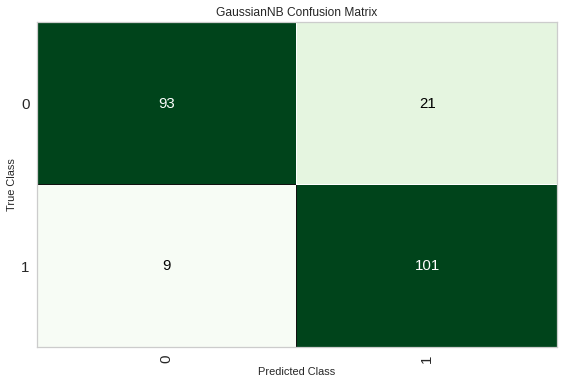

In [ ]:
plot_model(tuned_nb, plot = 'confusion_matrix')

In [ ]:
final_model = finalize_model(tuned_nb)

นำชุดข้อมูลทั้ง Train และ Test มารวมกันอีกครั้ง แล้วนำโมเดลจากขั้นตอนก่อนหน้ามาทำการสร้างใหม่ด้วยข้อมูลทั้งหมดก่อนที่จะนำไปใช้จริง ด้วยการใช้ฟังก์ชัน finalize_model

In [ ]:
final_model

GaussianNB(priors=None, var_smoothing=1e-09)

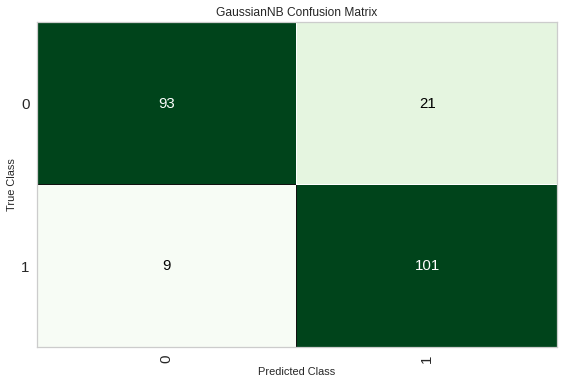

In [ ]:
plot_model(final_model,plot = 'confusion_matrix')

In [ ]:
save_model (final_model, 'Final  Model nb')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['FastingBS',
                                                             'ChestPainType_bin',
                                                             'RestingECG_bin',
                                                             'ExerciseAngina_bin',
                                                             'ST_Slope_bin',
                                                             'age_bin',
                                                             'Sex_bin'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=['RestingBP',
                                                           'Cholesterol',
                                                           'M

In [ ]:
saved_final_nb = load_model('Final  Model nb')

Transformation Pipeline and Model Successfully Loaded


####feature selection (feature importance)

In [ ]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
X.columns

Index(['RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'Sex_bin',
       'ChestPainType_bin', 'RestingECG_bin', 'ExerciseAngina_bin',
       'ST_Slope_bin', 'age_bin'],
      dtype='object')

In [ ]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(saved_final_nb, X, y)
imps.importances_mean

array([ 0.        ,  0.        , -0.00134048,  0.00294906,  0.01823056,
        0.00643432,  0.04450402,  0.00080429,  0.01742627,  0.09785523,
        0.00911528])

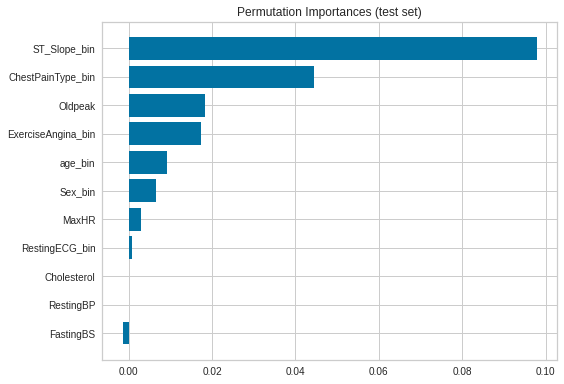

In [ ]:
sorted_idx = imps.importances_mean.argsort()

fig, ax = plt.subplots()
ax.barh(X.columns[sorted_idx], imps.importances[sorted_idx].mean(axis=1).T)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

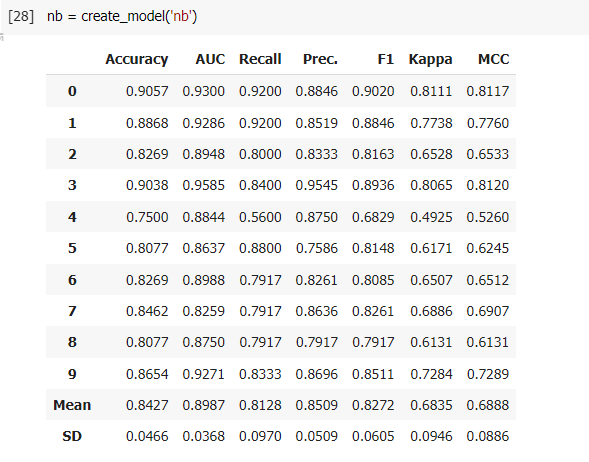

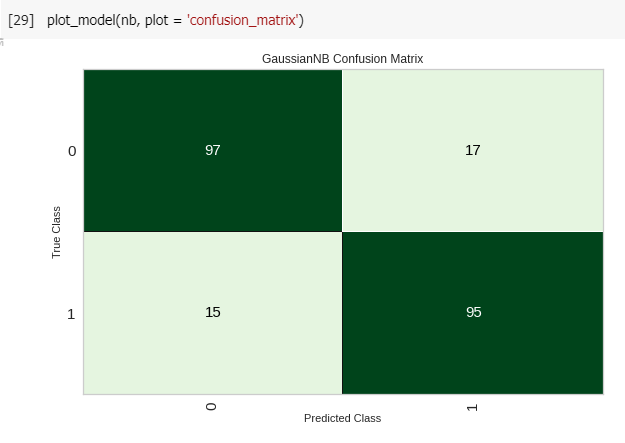

เมื่อเราลองตัด feature Cholesterol และ RestingBP  และ FastingBS ออก จะทำให้ผลของ Recall นั้นลดน้อยลงเราจึงไม่ทำการตัดออก

#### Evaluation

In [ ]:
saved_final_nb

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['FastingBS',
                                                            'ChestPainType_bin',
                                                            'RestingECG_bin',
                                                            'ExerciseAngina_bin',
                                                            'ST_Slope_bin',
                                                            'age_bin',
                                                            'Sex_bin'],
                                      display_types=False, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['RestingBP',
                                                          'Cholesterol',
                                                          'MaxHR', 'Oldpeak

####Prediction

In [ ]:
data = df.loc[0:5]

In [ ]:
predic = predict_model(saved_final_nb, data=data)

In [ ]:
predic

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_bin,ChestPainType_bin,RestingECG_bin,ExerciseAngina_bin,ST_Slope_bin,age_bin,Label,Score
0,140,289.0,0,172,0.0,0,0,1,0,0,2,2,0,1.0000
1,160,180.0,0,156,1.0,1,1,2,0,0,1,2,0,0.8577
2,130,283.0,0,98,0.0,0,0,1,1,0,2,2,0,0.9999
3,138,214.0,0,108,1.5,1,1,0,0,1,1,2,1,0.9999
4,150,195.0,0,122,0.0,0,0,2,0,0,2,3,0,0.9947
5,120,339.0,0,170,0.0,0,0,2,0,0,2,2,0,0.9999


Score 0.8577 หมายถึงความน่าจะเป็น 85.77% สำหรับการไม่มีการแปลง

# Pipeline

In [ ]:
class PipeLine():
    def __init__(self,data):
        self.data = data.copy()

    def build_columns(self):
      self.data['Sex_bin'] = self.data['Sex'].apply(lambda x: 1 if x=='F' else 0)
      self.data['ChestPainType_bin'] = self.data['ChestPainType'].apply(lambda x: 0 if x=='ASY' else (1 if x=='ATA' else (2 if x=='NAP' else 3)))
      self.data['RestingECG_bin'] = self.data['RestingECG'].apply(lambda x: 0 if x=='Normal' else (1 if x=='ST' else 2))
      self.data['ExerciseAngina_bin'] = self.data['ExerciseAngina'].apply(lambda x: 1 if x=='Y' else 0)
      self.data['ST_Slope_bin'] = self.data['ST_Slope'].apply(lambda x: 0 if x=='Down' else (1 if x=='Flat' else 2))
      self.data['age_bin'] = Age_bin(self.data['Age'])
    def convert_data(self):
      self.data = self.data.drop(self.data[(self.data['RestingBP'] == 0)].index)
      med,min,max = get_iqr_values(self.data,'Cholesterol')
      for i in heart['Cholesterol']:
          if i > max:
                  self.data['Cholesterol'] = self.data['Cholesterol'].replace(i, max)
      self.data = self.data.drop(self.data[(self.data['Cholesterol'] == 0)].index)
    def execute(self):
      self.build_columns()
      self.convert_data()
      drop_col = ['ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope','Age','Sex']
      self.data = self.data.drop(drop_col, axis=1)
      return self.data

In [ ]:
data = heart.loc[0:5]

In [ ]:
pipe = PipeLine(data)

In [ ]:
test = pipe.execute()

In [ ]:
dta = predict_model(saved_final_nb, data=test)

In [ ]:
dta

,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_bin,ChestPainType_bin,RestingECG_bin,ExerciseAngina_bin,ST_Slope_bin,age_bin,Label,Score
0,140,289,0,172,0.0,0,0,1,0,0,2,2,0,1.0000
1,160,180,0,156,1.0,1,1,2,0,0,1,2,0,0.8577
2,130,283,0,98,0.0,0,0,1,1,0,2,2,0,0.9999
3,138,214,0,108,1.5,1,1,0,0,1,1,2,1,0.9999
4,150,195,0,122,0.0,0,0,2,0,0,2,3,0,0.9947
5,120,339,0,170,0.0,0,0,2,0,0,2,2,0,0.9999


test case ใช้ชุดเดียวกันทั้งบนและล้าง ด้วย

# Deployment

In [ ]:
!pip install gradio -q

     |████████████████████████████████| 981 kB 14.7 MB/s 
     |████████████████████████████████| 2.0 MB 36.2 MB/s 
     |████████████████████████████████| 206 kB 82.6 MB/s 
     |████████████████████████████████| 3.6 MB 64.5 MB/s 
     |████████████████████████████████| 961 kB 83.2 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 


In [ ]:
import gradio as gr

In [ ]:
def prediction(age,sex,resbp,chol,maxhr,oldp,fastbs,chip,restecg,exeang,stp) :
  data = pd.DataFrame({"Age": age, "Sex": sex, "RestingBP": resbp,
                      "Cholesterol": chol, "MaxHR": maxhr, "Oldpeak": oldp,"FastingBS": fastbs,
                      "ChestPainType": chip, "RestingECG": restecg, "ExerciseAngina": exeang, "ST_Slope": stp}, index=[0])
  pipe = PipeLine(data)
  dt = pipe.execute()
  result = predict_model(saved_final_nb, data=dt)
  if(int(result['Label']) == 1):
      pre = "เสี่ยงหัวใจล้มเหลว"
  else:
      pre = "ไม่เสี่ยงหัวใจล้มเหลว"
  return pre

age = gr.inputs.Slider(10, 100, 1, 20, label="Age")
sex = gr.inputs.Radio(["F", "M"], type="value",label="Sex")
resbp =gr.inputs.Slider(0, 500, 1, 100,label= "Resting Blood Pressure") 
chol = gr.inputs.Slider(20, 500, 1, 100, label="Cholesterol")
maxhr = gr.inputs.Slider(0, 400, 1, 100, label="Max Heart rate")
oldp = gr.inputs.Slider(0, 6,0.1, label="Oldpeak")
fastbs =  gr.inputs.Radio(["less than 120", "More than 120"], type="index",label="Fasting blood sugar")
chip = gr.inputs.Dropdown(["ASY", "ATA","NAP","TA"], type="value",label="ChestPainType")
restecg = gr.inputs.Dropdown(["Normal", "ST","LVH"], type="value",label="RestingECG")
exeang = gr.inputs.Radio(["Y", "N"], type="value",label="ExerciseAngina")
stp = gr.inputs.Dropdown(["Down", "Flat","Up"], type="value",label="ST_Slope")


# gr.inputs.Dropdown(pipeline.cpt, default=pipeline.cpt[0], label="Chest Pain Type")
exam_input = [[40,'M',140,289,172,0.0,"less than 120",'ATA','Normal','N','Up'],
              [21,'F',160,180,156,1.0,"less than 120","NAP","Normal","N","Flat"],
              [40,'F',138,214,108,1.5,"less than 120","ASY","Normal","Y","Flat"]]
gr.Interface(prediction, [age,sex,resbp,chol,maxhr,oldp,fastbs,chip,restecg,exeang,stp] ,"label",examples=exam_input).launch()
# gr.Interface(prediction, [age,sex,resbp,chol,maxhr,oldp,fastbs,chip,restecg,exeang,stp], "label").launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://58643.gradio.app

This share link will expire in 72 hours. To get longer links, send an email to: support@gradio.app


(<Flask 'gradio.networking'>,
 'http://127.0.0.1:7860/',
 'https://58643.gradio.app')

#References

https://www.kaggle.com/kaanboke/a-gentle-intro-to-pycaret-beginner-friendly

https://bit.ly/3oKQymP

https://bit.ly/3Gx0SEQ